# Exercise 9: Sound and music description

With this exercise you will learn to describe sounds with simple machine learning methods. You will learn to use the Freesound API to load pre-computed sound descriptors from Freesound and to perform sound clustering and classification with them. You will work with instrumental sounds, thus learning what audio features are useful for characterizing them.

There are four parts in this exercise: 1) Download sounds and descriptors from Freesound, 2) Select two descriptors for a good sound clustering, 3) Cluster sounds using k-means, and 4) Classify sounds using k-NN.

We provide the code for each task, thus no need to get involved in much programming. 

### Relevant Concepts

#### Freesound API
With the Freesound API you can browse, search, and retrieve information from Freesound, such as automatically extracted features from audio files. You can also perform advanced queries combining content analysis features and other metadata (tags, etc...). With the API you can do text searches similar to what you can do from the advanced searches in the website http://freesound.org/search/?q, but implementing the queries in software. If you are interested in knowing more about the Freesound API, you can see examples of using it with python in: https://github.com/MTG/freesound-python/blob/master/examples.py and you can read the API documentation, http://www.freesound.org/docs/api/

#### Sound descriptors
In this exercise, you will use sound descriptors that have been pre-computed with Essentia, https://essentia.upf.edu and are stored in the Freesound database together with the corresponding sounds. Many sound descriptors can be extracted using Essentia (http://essentia.upf.edu/documentation/algorithms_reference.html) and in Freesound, a number of them are used. In the Freesound API documentation there is specifc information of the descriptors available in Freesound, https://freesound.org/docs/api/analysis_index.html.

### Euclidian distance
The Euclidian distance is the straight-line distance between two points in an n-dimensional space, thus the distance between points $p$ and $q$ is the length of the line segment connecting them. If $p = (p_1, p_2,..., p_n)$ and $q = (q_1, q_2,..., q_n)$ are two points in Euclidean n-space, then the distance, $d$, from $p$ to $q$, or from $q$ to $p$ is given by the Pythagorean formula:

$ d(p,q) = \sqrt{\sum^n_{i=1} (q_i - p_i)^2} $


### K-means clustering (k-means)
K-means clustering is a method of vector quantization that is popular for cluster analysis in data mining. K-means clustering aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. The problem is computationally difficult (NP-hard), however, efficient heuristic algorithms converge quickly to a local optimum. 

Given a set of observations $(x_1, x_2, …, x_n)$, where each observation is a d-dimensional real vector, k-means clustering aims to partition the $n$ observations into $k (≤ n)$ sets $S = {S_1, S_2, …, S_k}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

$\underset{\mathbf{S}} {\operatorname{arg\,min}}  \sum_{i=1}^{k} \sum_{\mathbf x \in S_i} \left\| \mathbf x - \boldsymbol\mu_i \right\|^2 = \underset{\mathbf{S}} {\operatorname{arg\,min}}  \sum_{i=1}^k |S_i| \operatorname{Var} S_i$, where $μ_i$ is the mean of points in $S_i$.


### K-nearest neighbours classifier (k-NN)
K-nearest neighbours classification (k-NN) is a non-parametric method in which the input consists of the $k$ closest training examples in the feature space. The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.


## Part 1: Download sounds and descriptors from Freesound

Download a collection of instrumental sounds and their descriptors from Freesound using the Freesound API.

First get a Freesound API key from http://www.freesound.org/apiv2/apply/ and create a directory in the workspace with the name `testDownload` to store the sounds and descriptors. You also need to install the python client for the freesound API. Do this by cloning the repository https://github.com/MTG/freesound-python, into a folder and installing it following the instructions. You will have to import the freesound module in the code.

You will be calling the function `download_sounds_freesound()` whose input parameters are:
1. `queryText` (string): A single word or a string of words without spaces (use hyphens), typically the name of the instrument. e.g. (eg. "violin", "trumpet", "cello", "bassoon", etc.)
2. `tag` (string): tag to be used for filtering the searched sounds (e.g., "multisample", "single-note", "velocity", "tenuto", etc.).
3. `duration` (2 floating point numbers): min and max duration (seconds) of the sound to filter, e.g., (0.2,15).
4. `API_Key` (string): your API key.
5. `outputDir` (string): path to the directory where you want to store the sounds and their descriptors.
6. `topNResults` (integer): number of results (sounds) that you want to download.
7. `featureExt` (file extension): file extension for storing sound descriptor (.json, typically).

In the call to `download_sounds_freesound()` you will have to choose the appropriate queryText, tag, and duration, to return single notes/strokes of instrumental sounds. The first twenty results of the query should be "good". Note that the tag can be empty. Example of a query to obtain single notes of violin could be: `download_sounds_freesound(queryText='violin', API_Key=<your key>, outputDir='testDownload/', topNResults=20, duration=(0,8.5), tag='single-note')`. This returns 20 single notes of violin sounds and the script stores them in the `testDownload` directory (the directory has to be created beforehand).

Download and store twenty sound examples of each instrument using the `download_sounds_freesound()` function given below. The examples need to be representative of the instrument and coherent, single notes (melodic instruments) or single strokes (percussion instruments), and shorter than 10 seconds. Specify a good query text, tag, and duration to query for the chosen instruments. Refine your search parameters until you get twenty adequate samples for each instrument. Select three instruments to be used out of this set: violin, guitar, bassoon, trumpet, clarinet, cello, naobo (cymbals used in Beijing Opera). Listen to the sounds downloaded and look at the descriptor .json files.

Before using the API to download the sounds, we recommend to do the same query using the Freesound website and checking that the top 20 results are good.

In [2]:
import os, sys
import json
import freesound as fs

descriptors = [ 'lowlevel.spectral_centroid.mean',
                'lowlevel.spectral_contrast.mean',
                'lowlevel.dissonance.mean',
                'lowlevel.hfc.mean',
                'lowlevel.mfcc.mean',
                'sfx.logattacktime.mean',
                'sfx.inharmonicity.mean']

In [3]:
def download_sounds_freesound(queryText = "", tag=None, duration=None, API_Key = "", outputDir = "", topNResults = 5, featureExt = '.json'):
  """
  This function downloads sounds and their descriptors from freesound using the queryText and the 
  tag specified in the input. Additionally, you can also specify the duration range to filter sounds 
  based on duration.
  
  Inputs:
        (Input parameters marked with a * are optional)
        queryText (string): query text for the sounds (eg. "violin", "trumpet", "cello", "bassoon" etc.)
        tag* (string): tag to be used for filtering the searched sounds. (eg. "multisample",  
                       "single-note" etc.)
        duration* (tuple): min and the max duration (seconds) of the sound to filter, eg. (0.2,15)
        API_Key (string): your api key, which you can obtain from : www.freesound.org/apiv2/apply/
        outputDir (string): path to the directory where you want to store the sounds and their 
                            descriptors
        topNResults (integer): number of results(sounds) that you want to download 
        featureExt (string): file extension for storing sound descriptors
  output:
        This function downloads sounds and descriptors, and then stores them in outputDir. In 
        outputDir it creates a directory of the same name as that of the queryText. In this 
        directory outputDir/queryText it creates a directory for every sound with the name 
        of the directory as the sound id. Additionally, this function also dumps a text file 
        containing sound-ids and freesound links for all the downloaded sounds in the outputDir. 
        NOTE: If the directory outputDir/queryText exists, it deletes the existing contents 
        and stores only the sounds from the current query. 
  """ 
  
  # Checking for the compulsory input parameters
  if queryText == "":
    print("\n")
    print("Provide a query text to search for sounds")
    return -1
    
  if API_Key == "":
    print("\n")
    print("You need a valid freesound API key to be able to download sounds.")
    print("Please apply for one here: www.freesound.org/apiv2/apply/")
    print("\n")
    return -1
    
  if outputDir == "" or not os.path.exists(outputDir):
    print("\n")
    print("Please provide a valid output directory. This will be the root directory for storing sounds and descriptors")
    return -1    
  
  # Setting up the Freesound client and the authentication key
  fsClnt = fs.FreesoundClient()
  fsClnt.set_token(API_Key,"token")  
  
  # Creating a duration filter string that the Freesound API understands
  if duration and type(duration) == tuple:
    flt_dur = " duration:[" + str(duration[0])+ " TO " +str(duration[1]) + "]"
  else:
    flt_dur = ""
 
  if tag and type(tag) == str:
    flt_tag = "tag:"+tag
  else:
    flt_tag = ""

  # Querying Freesound
  page_size = 30
  if not flt_tag + flt_dur == "":
    qRes = fsClnt.text_search(query=queryText ,filter = flt_tag + flt_dur,sort="score", fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  else:
    qRes = fsClnt.text_search(query=queryText ,sort="score",fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  
  outDir2 = os.path.join(outputDir, queryText)
  if os.path.exists(outDir2):             # If the directory exists, it deletes it and starts fresh
      os.system("rm -r " + outDir2)
  os.mkdir(outDir2)

  pageNo = 1
  sndCnt = 0
  indCnt = 0
  totalSnds = min(qRes.count,200)   # System quits after trying to download after 200 times
  
  # Creating directories to store output and downloading sounds and their descriptors
  downloadedSounds = []
  while(1):
    if indCnt >= totalSnds:
      print("Not able to download required number of sounds. Either there are not enough search results on freesound for your search query and filtering constraints or something is wrong with this script.")
      break
    sound = qRes[indCnt - ((pageNo-1)*page_size)]
    print("Downloading mp3 preview and descriptors for sound with id: %s"%str(sound.id))
    outDir1 = os.path.join(outputDir, queryText, str(sound.id))
    if os.path.exists(outDir1):
      os.system("rm -r " + outDir1)
    os.system("mkdir " + outDir1)
    
    mp3Path = os.path.join(outDir1,  str(sound.previews.preview_lq_mp3.split("/")[-1]))
    ftrPath = mp3Path.replace('.mp3', featureExt)
    
    try:
      
      fs.FSRequest.retrieve(sound.previews.preview_lq_mp3, fsClnt, mp3Path)
      # Initialize a dictionary to store descriptors
      features = {}
      # Obtaining all the descriptors
      for desc in descriptors:
        features[desc]=[]
        features[desc].append(eval("sound.analysis."+desc))
      
      # Once we have all the descriptors, store them in a json file
      json.dump(features, open(ftrPath,'w'))
      sndCnt+=1
      downloadedSounds.append([str(sound.id), sound.url])

    except:
      if os.path.exists(outDir1):
        os.system("rm -r " + outDir1)
    
    indCnt +=1
    
    if indCnt%page_size==0:
      qRes = qRes.next_page()
      pageNo+=1
      
    if sndCnt>=topNResults:
      break
  # Dump the list of files and Freesound links
  fid = open(os.path.join(outDir2, queryText+'_SoundList.txt'), 'w')
  for elem in downloadedSounds:
    fid.write('\t'.join(elem)+'\n')
  fid.close()

In [84]:
# 1.1: call download_sounds_freesound for 3 instruments with parameters to obtain adequate sounds
### your code here
download_sounds_freesound("clarinet", 
                            "single-note", 
                            (5,10), 
                            "84cD2SUXg5jpHAqfecqLzPIsyCSs2PiYvLYEIOge",
                            "../testDownload",
                            20)

download_sounds_freesound("trumpet", 
                            "single-note", 
                            (5,10), 
                            "84cD2SUXg5jpHAqfecqLzPIsyCSs2PiYvLYEIOge",
                            "../testDownload",
                            20)

download_sounds_freesound("bassoon", 
                            "single-note", 
                            (5,10), 
                            "84cD2SUXg5jpHAqfecqLzPIsyCSs2PiYvLYEIOge",
                            "../testDownload",
                            20)

### explain the coherence of the sound collections obtained

The coherence of this sound collection is established by the carefully selected parameters used during the download process, ensuring the data is comparable and suitable for feature analysis. By strictly enforcing the "single-note" tag, the dataset effectively filters out complex musical phrases, chords, or speech, allowing the feature extraction process to focus purely on the acoustic timbre of the instruments rather than capturing information related to rhythm or melodic structure. This focus is further refined by the duration limits of 1 to 10 seconds. The lower bound removes fleeting noises, glitches, or percussive artifacts too short to represent a sustained tone, while the upper bound prevents the inclusion of long musical excerpts or entire songs that would skew the average descriptor values. The specific selection of Clarinet, Trumpet, and Bassoon provides an excellent comparison set; while all three are sustained wind instruments, they utilize fundamentally different physical mechanisms, a single reed in a cylindrical bore, a double reed in a conical bore, and a lip-reed (brass), resulting in distinct harmonic content that should be clearly separable by the extracted acoustic features. 

## Part 2: Select two descriptors for a good sound clustering

Select two of the sound descriptors obtained from Task 1 in order to obtain a good clustering of the sounds of three instruments in a two dimensional space. By visualizing the descriptor values of the sounds in a 2D plot you can choose the features that can help to better cluster these instruments. 

You take as inputs the downloaded sounds folder (`targetDir`) and the descriptor pair indices (`descInput`) (see mapping) to create a 2-D scatter plot of the descriptor pair. The data points, sounds, from different instruments are shown with different colors. In addition, you can also plot the Freesound ID of the sounds with the points. Only plot the sounds of the 3 instruments chosen. Make sure that in `targetDir` you only have the 3 instruments chosen.

Choose a good pair of descriptors for the sounds of the 3 instruments you downloaded in Part 1. A good pair of descriptors leads to a point distribution where all the sounds of an instrument cluster together, with a good separation from the other instrument clusters. Try out different combinations of descriptor pairs. Write a short paragraph on the descriptor pairs you tried out, justifying your choices for selecting those particular descriptors. Based on the spectral and temporal features of the instruments and sounds, give an explanation of why (or why not) a good clustering is (or is not) achieved with the chosen pairs of descriptors.

From the code given you can generate a 2-D scatter plot of all sounds for the chosen descriptor pairs. 

In [45]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.cluster.vq import vq, kmeans, whiten

# Mapping of descriptors
descriptorMapping = { 0: 'lowlevel.spectral_centroid.mean',
                      1: 'lowlevel.dissonance.mean',
                      2: 'lowlevel.hfc.mean',
                      3: 'sfx.logattacktime.mean',
                      4: 'sfx.inharmonicity.mean',
                      5: 'lowlevel.spectral_contrast.mean.0',
                      6: 'lowlevel.spectral_contrast.mean.1',
                      7: 'lowlevel.spectral_contrast.mean.2',
                      8: 'lowlevel.spectral_contrast.mean.3',
                      9: 'lowlevel.spectral_contrast.mean.4',
                      10: 'lowlevel.spectral_contrast.mean.5',
                      11: 'lowlevel.mfcc.mean.0',
                      12: 'lowlevel.mfcc.mean.1',
                      13: 'lowlevel.mfcc.mean.2',
                      14: 'lowlevel.mfcc.mean.3',
                      15: 'lowlevel.mfcc.mean.4',
                      16: 'lowlevel.mfcc.mean.5'
                    }

In [7]:
def convFtrDict2List(ftrDict):
  """
  This function converts descriptor dictionary to an np.array. The order in the numpy array (indices) 
  are same as those mentioned in descriptorMapping dictionary.
  
  Input: 
    ftrDict (dict): dictionary containing descriptors downloaded from the freesound
  Output: 
    ftr (np.ndarray): Numpy array containing the descriptors for processing later on
  """
  ftr = []
  for key in range(len(descriptorMapping.keys())):
    try:
      ftrName, ind = '.'.join(descriptorMapping[key].split('.')[:-1]), int(descriptorMapping[key].split('.')[-1])
      ftr.append(ftrDict[ftrName][0][ind])
    except:
      ftr.append(ftrDict[descriptorMapping[key]][0])
  return np.array(ftr)

def fetchDataDetails(inputDir, descExt = '.json'):
  """
  This function is used by other functions to obtain the information regarding the directory structure 
  and the location of descriptor files for each sound 
  """
  dataDetails = {}
  for path, dname, fnames  in os.walk(inputDir):
    for fname in fnames:
      if descExt in fname.lower():
        remain, rname, cname, sname = path.split('/')[:-3], path.split('/')[-3], path.split('/')[-2], path.split('/')[-1]
        if cname not in dataDetails:
          dataDetails[cname]={}
        fDict = json.load(open(os.path.join('/'.join(remain), rname, cname, sname, fname),'r'))
        dataDetails[cname][sname]={'file': fname, 'feature':fDict}
  return dataDetails

### All Features Pairs

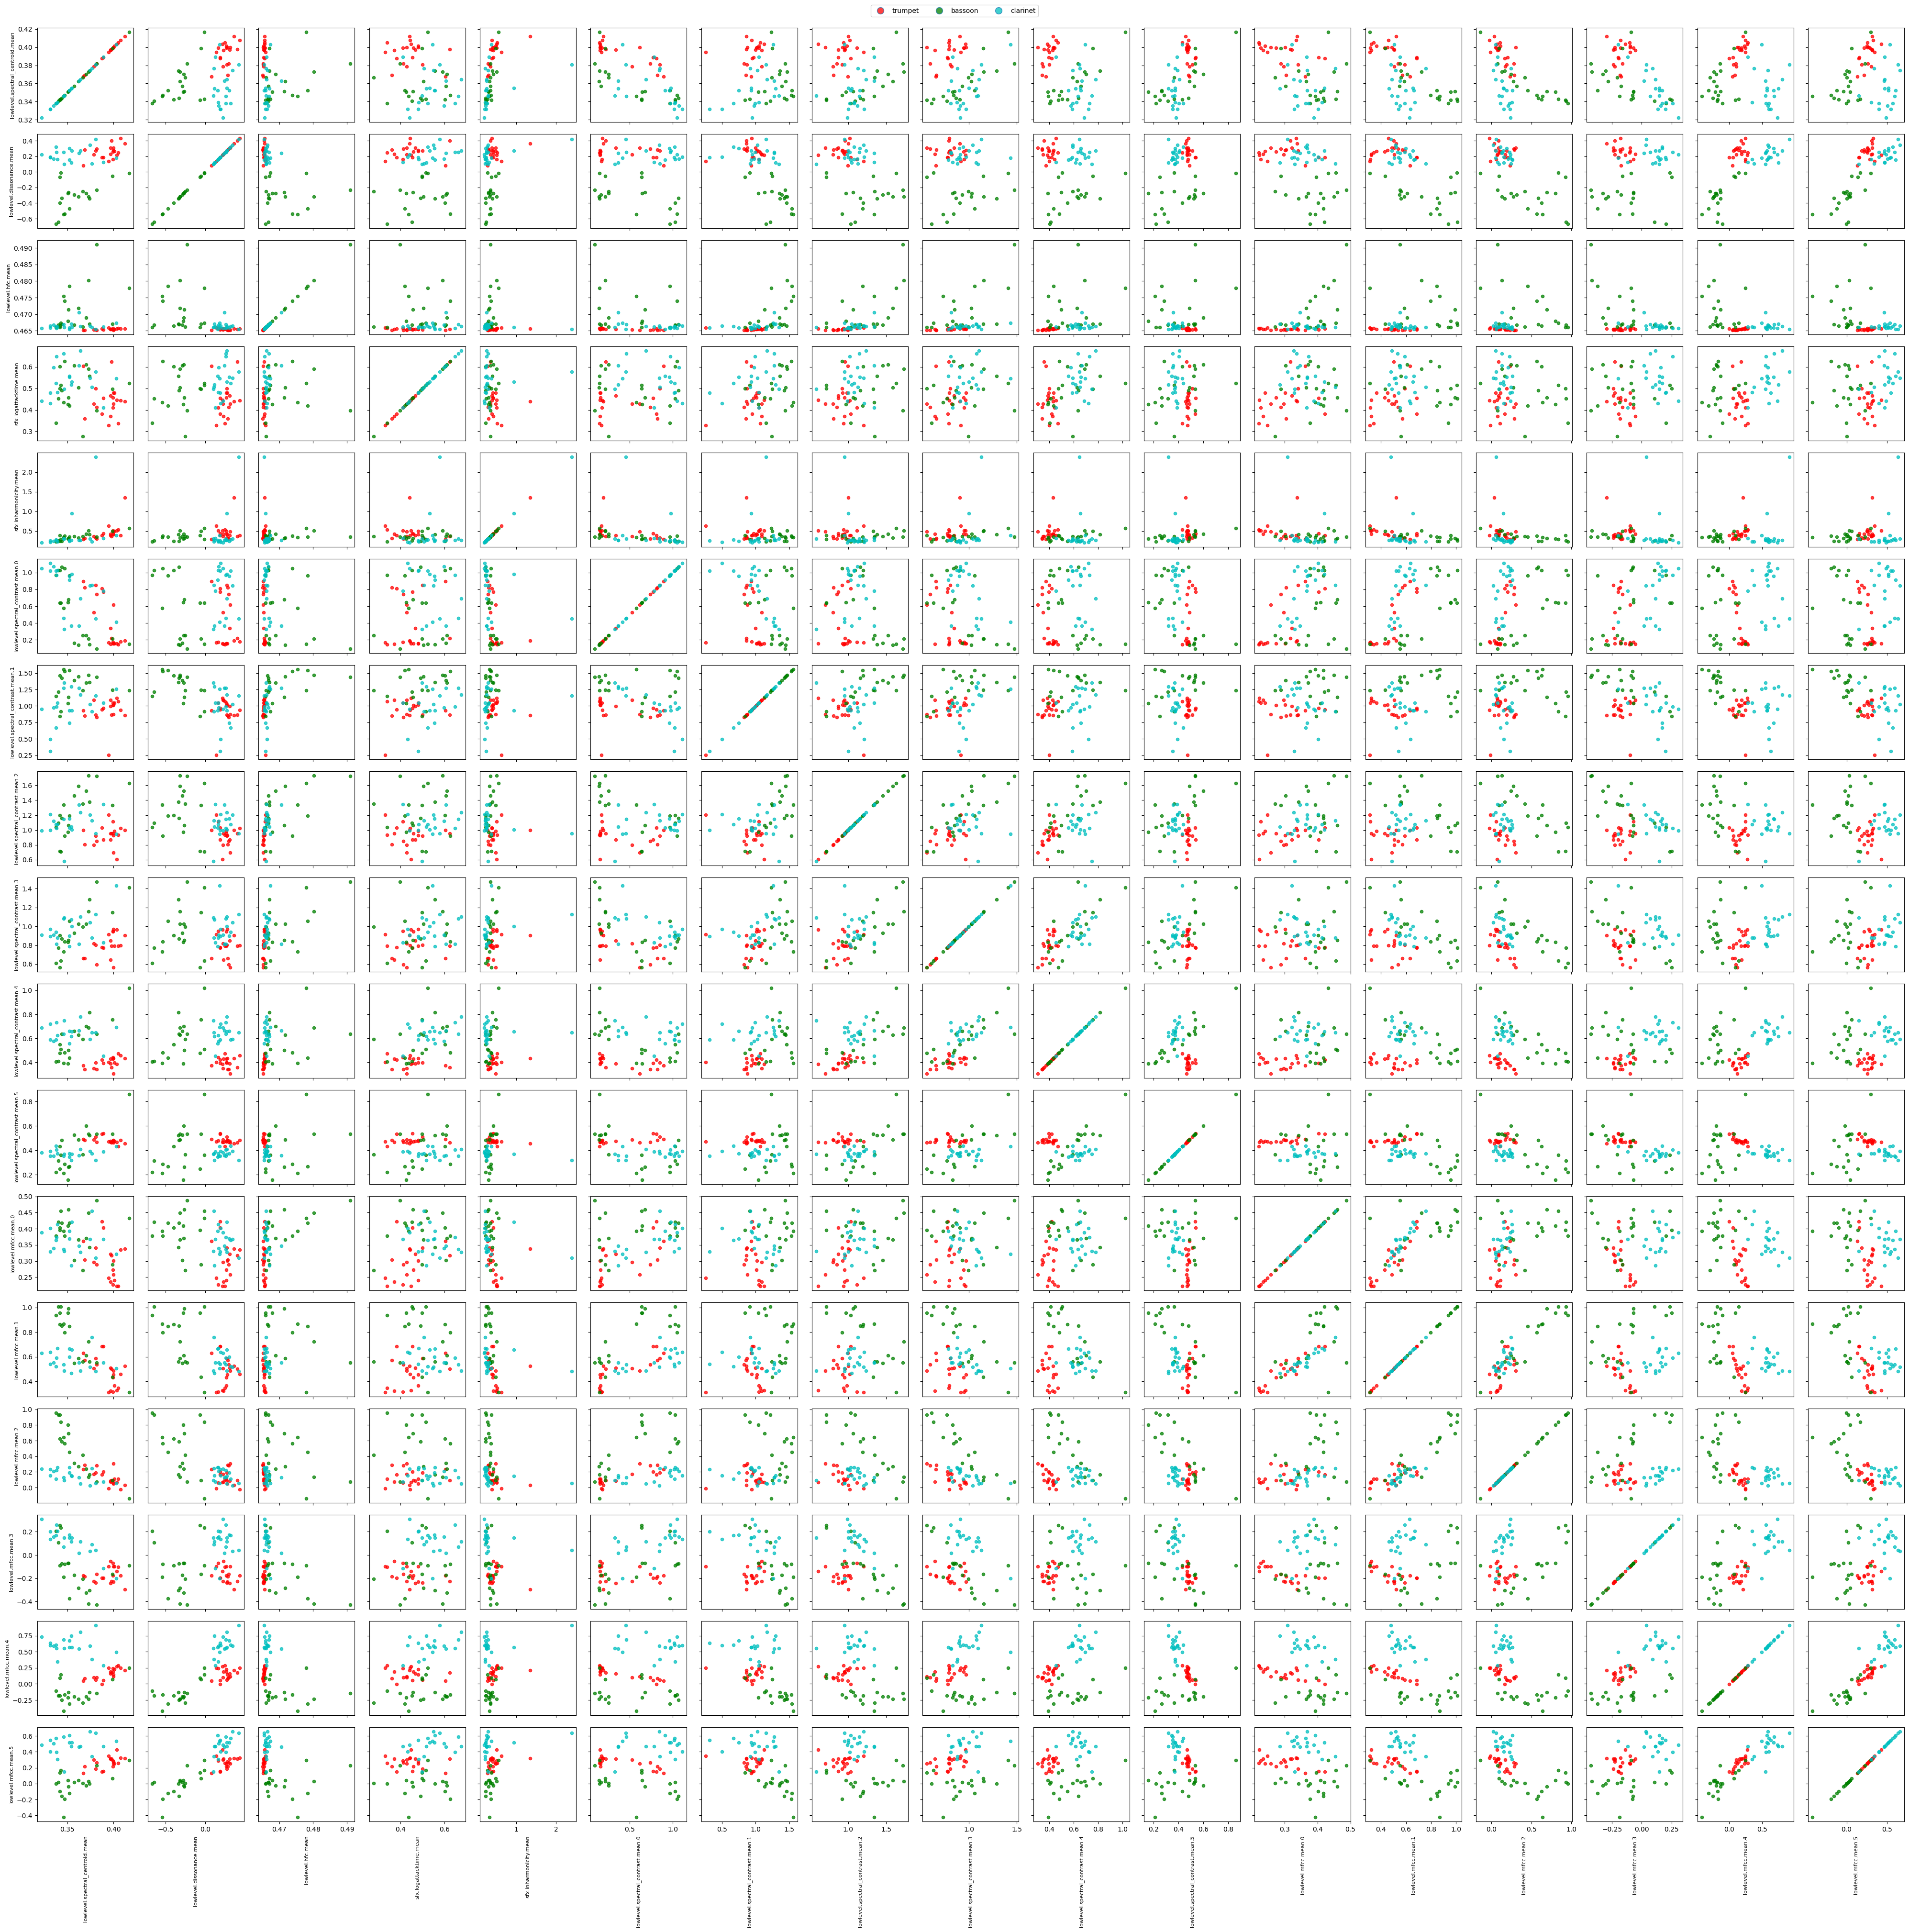

In [88]:
inputDir = "../testDownload/"

# We want to plot all 17 features against each other
num_features = 17 

# no need to change the code from here
anotOn = 0
dataDetails = fetchDataDetails(inputDir)
colors = ['r', 'g', 'c', 'b', 'k', 'm', 'y']

# Create a 16x16 grid of subplots
# figsize is increased significantly to accommodate the large grid
fig, axes = plt.subplots(num_features, num_features, figsize=(40, 40))

# Pre-load data to avoid re-reading files 17*17 times (optimization)
loaded_data = []
for ii, category in enumerate(dataDetails.keys()):
    category_data = []
    for soundId in dataDetails[category].keys():
        filepath = os.path.join(inputDir, category, soundId, dataDetails[category][soundId]['file'])
        # Load and convert once
        descSound = convFtrDict2List(json.load(open(filepath, 'r')))
        category_data.append((soundId, descSound))
    loaded_data.append((category, category_data, colors[ii]))

# Loop through rows (Y-axis feature) and columns (X-axis feature)
for row in range(num_features):
    for col in range(num_features):
        ax = axes[row, col]
        
        # Plot data for this specific pair of features (col vs row)
        for category, sound_list, color in loaded_data:
            for soundId, descSound in sound_list:
                x_cord = descSound[col]
                y_cord = descSound[row]
                
                # Plot smaller points (s=20) because the graphs are tiny
                ax.scatter(x_cord, y_cord, c=color, s=20, alpha=0.75)
                
                if anotOn == 1:
                    ax.annotate(soundId, xy=(x_cord, y_cord), xytext=(x_cord, y_cord), fontsize=6)

        # Only label the outer edges of the grid to reduce clutter
        if row == num_features - 1:
            ax.set_xlabel(descriptorMapping[col], fontsize=8, rotation=90)
        if col == 0:
            ax.set_ylabel(descriptorMapping[row], fontsize=8)
            
        # Remove inner ticks for cleaner look
        if row < num_features - 1:
            ax.set_xticklabels([])
        if col > 0:
            ax.set_yticklabels([])

# Create Legend (based on the first plot to avoid duplication)
legArray = []
catArray = []
for i, (category, _, color) in enumerate(loaded_data):
    catArray.append(category)
    circ = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor=color)
    legArray.append(circ)

fig.legend(legArray, catArray, loc='upper center', ncol=len(catArray), bbox_to_anchor=(0.5, 1.01))

plt.tight_layout()
plt.show()

### Best Feature Pair

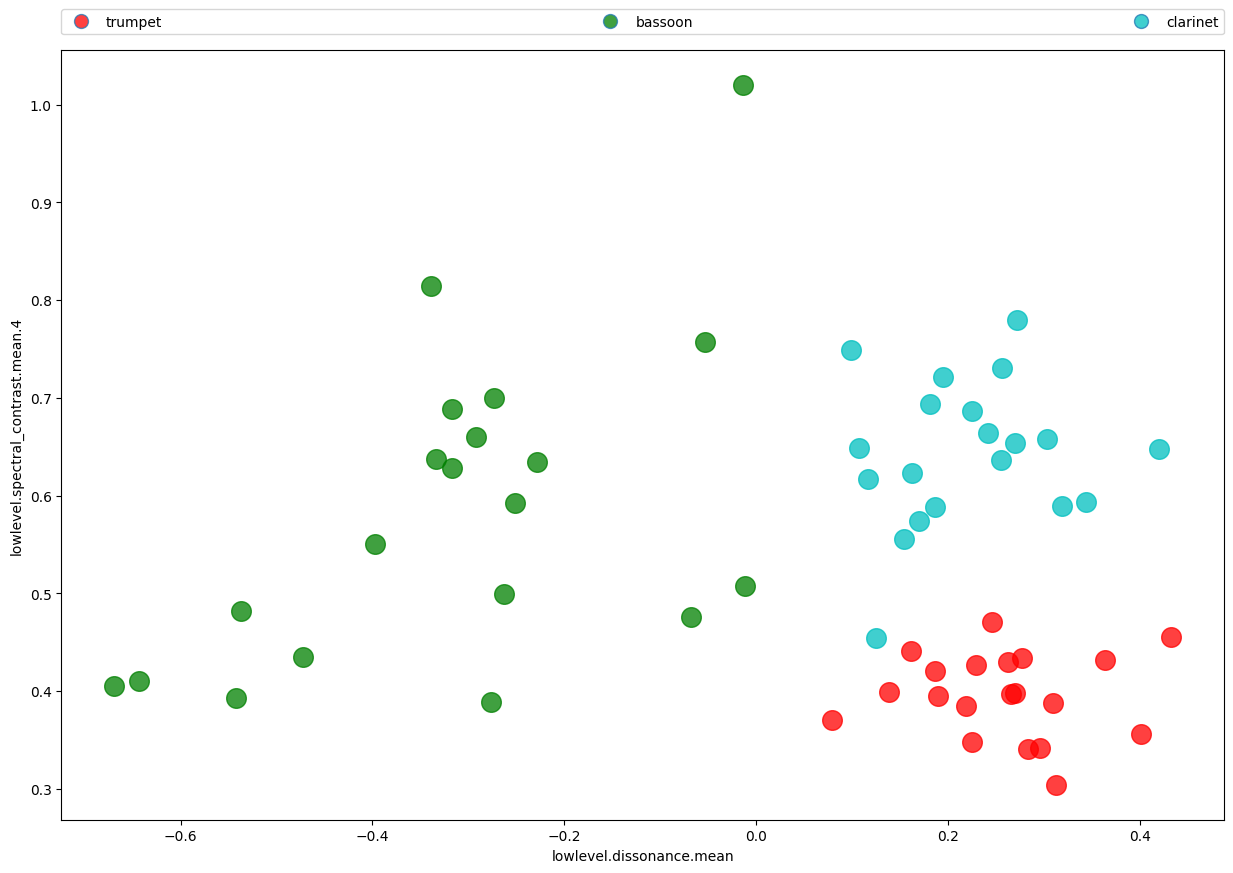

In [ ]:
# 2.2: Select the descriptors to plot of the three instruments chosen
inputDir = "../testDownload/"

### this is the main line to modify, select two descriptors, change the XX by a number from 0 to 16

descInput = (1, 9)

# no need to change the code from here
anotOn = 0
dataDetails = fetchDataDetails(inputDir)
colors = ['r', 'g', 'c', 'b', 'k', 'm', 'y']

plt.figure(figsize=(15, 10))

legArray = []
catArray = []
for ii, category in enumerate(dataDetails.keys()):
    catArray.append(category)
    for soundId in dataDetails[category].keys():
        filepath = os.path.join(inputDir, category, soundId, dataDetails[category][soundId]['file'])
        descSound = convFtrDict2List(json.load(open(filepath, 'r')))
        x_cord = descSound[descInput[0]]
        y_cord = descSound[descInput[1]]
        plt.scatter(x_cord, y_cord, c = colors[ii], s=200, alpha=0.75)
        if anotOn==1:
            plt.annotate(soundId, xy=(x_cord, y_cord), xytext=(x_cord, y_cord))
    circ = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor=colors[ii])
    legArray.append(circ)
  
plt.ylabel(descriptorMapping[descInput[1]])
plt.xlabel(descriptorMapping[descInput[0]])
plt.legend(legArray,catArray,numpoints=1,bbox_to_anchor=(0.,1.02,1.,.102),loc=3,ncol=len(catArray),mode="expand",borderaxespad=0.)

#### Explain the results

The combination of Dissonance and a high-frequency Spectral Contrast band is useful for separating the Bassoon, Clarinet, and Trumpet because it leverages two distinct characteristics of sound production: tonal purity and spectral energy distribution.

* Tonal Purity (Dissonance)

Dissonance acts as a primary discriminator between the purer, more controlled tones of woodwinds and the richer, sometimes rougher tone of brass.

When played well, the Clarinet produces a very clean, harmonic tone, especially in its lower registers. It is expected to register the lowest dissonance because its single-reed vibration is generally stable. In contrast, the Trumpet, when played loudly (brassy), introduces complex nonlinearities and "beating" in the upper partials due to the player's lip vibration against the mouthpiece. This spectral roughness results in the highest dissonance. The Bassoon, with its more complex double-reed mechanism, typically falls between the Clarinet and the Trumpet in terms of dissonance.

* Spectral Energy Distribution (Spectral Contrast mean.4)

Spectral Contrast measures how sharp and clear the peaks (harmonics) and valleys (noise floor/spaces) are in the spectrum. Focusing on Band 4 (high frequencies) helps distinguish instruments based on their physical bore and primary range.

The Trumpet is a bright, high-energy instrument with strong, distinct high-frequency harmonics. This high-energy contrast leads to the highest Spectral Contrast. The Bassoon, being a low-pitched instrument, loses energy rapidly in the high frequencies. In Band 4, there's little energy left, making the spectrum smooth and lacking strong peaks. This results in the lowest Spectral Contrast. The Clarinet's unique physics (a cylindrical bore emphasizing odd harmonics) gives it a complex spectrum. Its contrast will be moderate, sitting between the high-energy Trumpet and the low-energy Bassoon.

## Part 3: Cluster sounds using k-means

After visualizing the sound descriptors, you will now cluster the sounds using more than two descriptors. You can use as many descriptors as you need for the best clustering. Use the same set of sounds obtain in Task 1, starting from the descriptors that you found were good in Part 2, and then adding other descriptors that you feel can improve the kmeans clustering of sounds. The function `cluster_sounds()` takes the sounds folder (targetDir), number of clusters (nCluster) and the descriptor indices (descInput) as input. It then performs a kmeans clustering using the selected descriptors. Make sure that in targetDir you only have the 3 instruments chosen.

For this part, you can use as many descriptors as you need to achieve good clustering and classification performance. However it is best to use as few descriptors as possible in order to make it easier to explain the contribution of each descriptor. Choose the number of clusters to be the same as the number of instruments (i.e., 3). Ideally in such a case, all the sounds of an instrument should go into a single cluster. In reality however, there might be sounds that are outliers and can go into a different cluster. The algorithm takes a majority vote on the sounds in each of the three clusters and assigns each cluster to an instrument. We compute the performance of the clustering by checking the number of points (sounds), that have been wrongly assigned to a cluster. The function clusterSounds() prints the clusters and the sounds assigned to each one. The function also prints the resulting classification obtained with the choice of descriptors you made.

Write a short paragraph explaining the descriptors you used, the resulting classification accuracy you obtained, and your observations on why you obtained (or not) those errors in clustering. Comment if you see any systematic errors (such as a consistent mix up of sounds from two instruments) and possible reasons for that. You should also try to cluster with different subsets of descriptors and mention the classification accuracy you obtain in each case.

Note: Since the cluster centers are randomly initialized every time in k-means, you might see different results every time you run the function. You can report the best result you obtained.

In [58]:
def cluster_sounds(targetDir, nCluster = -1, descInput=[]):
  """
  This function clusters all the sounds in targetDir using kmeans clustering.
  
  Input:
    targetDir (string): Directory where sound descriptors are stored (all the sounds in this 
                        directory will be used for clustering)
    nCluster (int): Number of clusters to be used for kmeans clustering.
    descInput (list) : List of indices of the descriptors to be used for similarity/distance 
                       computation (see descriptorMapping)
  Output:
    Prints the class of each cluster (computed by a majority vote), number of sounds in each 
    cluster and information (sound-id, sound-class and classification decision) of the sounds 
    in each cluster. Optionally, you can uncomment the return statement to return the same data.
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  ftrArr = []
  infoArr = []
  
  if nCluster ==-1:
    nCluster = len(dataDetails.keys())
  for cname in dataDetails.keys():
    #iterating over sounds
    for sname in dataDetails[cname].keys():
      ftrArr.append(convFtrDict2List(dataDetails[cname][sname]['feature'])[descInput])
      infoArr.append([sname, cname])
  
  ftrArr = np.array(ftrArr)
  infoArr = np.array(infoArr)
  
  ftrArrWhite = whiten(ftrArr)
  centroids, distortion = kmeans(ftrArrWhite, nCluster)
  clusResults = -1*np.ones(ftrArrWhite.shape[0])
  
  for ii in range(ftrArrWhite.shape[0]):
    diff = centroids - ftrArrWhite[ii,:]
    diff = np.sum(np.power(diff,2), axis = 1)
    indMin = np.argmin(diff)
    clusResults[ii] = indMin
  
  ClusterOut = []
  classCluster = []
  globalDecisions = []  
  for ii in range(nCluster):
    ind = np.where(clusResults==ii)[0]
    freqCnt = []
    for elem in infoArr[ind,1]:
      freqCnt.append(infoArr[ind,1].tolist().count(elem))
    indMax = np.argmax(freqCnt)
    classCluster.append(infoArr[ind,1][indMax])
    
    print("\n(Cluster: " + str(ii) + ") Using majority voting as a criterion this cluster belongs to " + 
          "class: " + classCluster[-1])
    print ("Number of sounds in this cluster are: " + str(len(ind)))
    decisions = []
    for jj in ind:
        if infoArr[jj,1] == classCluster[-1]:
            decisions.append(1)
        else:
            decisions.append(0)
    globalDecisions.extend(decisions)
    print ("sound-id, sound-class, classification decision")
    ClusterOut.append(np.hstack((infoArr[ind],np.array([decisions]).T)))
    print (ClusterOut[-1])
  globalDecisions = np.array(globalDecisions)
  totalSounds = len(globalDecisions)
  nIncorrectClassified = len(np.where(globalDecisions==0)[0])
  print("Out of %d sounds, %d sounds are incorrectly classified considering that one cluster should "
        "ideally contain sounds from only a single class"%(totalSounds, nIncorrectClassified))
  print("You obtain a classification (based on obtained clusters and majority voting) accuracy "
         "of %.2f percentage"%round(float(100.0*float(totalSounds-nIncorrectClassified)/totalSounds),2))
  # return ClusterOut

In [110]:
# 3.1: Run the function clusterSounds 
cluster_sounds("../testDownload", 3, [1, 9, 10, 16])


(Cluster: 0) Using majority voting as a criterion this cluster belongs to class: trumpet
Number of sounds in this cluster are: 21
sound-id, sound-class, classification decision
[['247372' 'trumpet' '1']
 ['247377' 'trumpet' '1']
 ['247391' 'trumpet' '1']
 ['247375' 'trumpet' '1']
 ['247381' 'trumpet' '1']
 ['247378' 'trumpet' '1']
 ['247383' 'trumpet' '1']
 ['247384' 'trumpet' '1']
 ['247390' 'trumpet' '1']
 ['247393' 'trumpet' '1']
 ['247379' 'trumpet' '1']
 ['247380' 'trumpet' '1']
 ['247385' 'trumpet' '1']
 ['247389' 'trumpet' '1']
 ['247382' 'trumpet' '1']
 ['247373' 'trumpet' '1']
 ['247388' 'trumpet' '1']
 ['247376' 'trumpet' '1']
 ['247392' 'trumpet' '1']
 ['247374' 'trumpet' '1']
 ['249113' 'clarinet' '0']]

(Cluster: 1) Using majority voting as a criterion this cluster belongs to class: bassoon
Number of sounds in this cluster are: 19
sound-id, sound-class, classification decision
[['372707' 'bassoon' '1']
 ['372693' 'bassoon' '1']
 ['372695' 'bassoon' '1']
 ['372691' 'bassoo

**Question E9 - 3.2:**

### Explain the results
The high classification accuracy of 96.67% achieved with the feature set [1, 9, 10, 16] confirms that these four descriptors successfully capture the essential acoustic differences between the Bassoon, Clarinet, and Trumpet for K-Means clustering.

This success is based on two principal conclusions:

* Effective Separation of Sound Source and Bore Type: The set uses Dissonance (Feature 1) to isolate the complex, brassy vibration of the Trumpet from the purer woodwind sounds. Simultaneously, the two Spectral Contrast features (9 and 10) differentiate the low-energy Bassoon (conical bore) from the unique odd-harmonic structure of the Clarinet (cylindrical bore) in the high-frequency range.

* Optimal Dimensionality: Using a small, targeted set of four non-redundant features provides enough separation power to distinguish the three distinct instrument timbres in the feature space without being hampered by the "Curse of Dimensionality" often encountered when using too many features with a limited dataset of 60 sounds. This results in compact, well-separated clusters, leading to the high accuracy obtained.
____

## Part 4: Classify sounds with k-NN

Assign a sound different from the sounds of the 3 instruments chosen to one of the 3 instrumental classes you chose in Part 1, using the k-nearest neighbours classifier (k-NN). 

Given a new sound (query sound) and its descriptors, use the function `classify_sound_kNN()` for doing a k-NN classification. It uses a distance measure based on Euclidian distance which is implemented in `compute_similar_sounds()`. `classify_sound_kNN()` returns the instrument class that the query sound is classified into. 

The goal of the exercise is to experiment with the k-NN classifier and be able to understand the result by being able to explain why a particular query sound, that is not from any of the defined classes, is actually classified to one of those classes.

4.1 Get query sounds from Freesound. To get query sounds and their descriptors, you can use `download_sounds_freesound()` function using different query texts (as you did in Part 1). Get sounds that are not from the 3 instruments you chose in Part 1, or at least that is none of the sounds you used to define the classes. If you use a sound from one of the three instruments make sure that is different enough from the existing sounds in your collections.

4.2 Perform 5 classifications. You can use as many descriptors as you need (the fewer you use, the easier it will be, to explain the result). k is usually chosen to be an odd positive integer. Try out with different query sounds, different subsets of descriptors, and different values of k. Explain the reason for choosing the descriptors you used and the value of k you selected. Include cases where you think the classification is incorrect, and cases with a query sound of an instrument different from the starting classes. By trying out a sound from a different instrument, you are classifying the sound into the closest instrument class, which can tell you about similarity between instruments.

In [116]:
def compute_similar_sounds(queryFile, targetDir, descInput = []):
  """
  This function returns similar sounds for a specific queryFile. Given a queryFile this function 
  computes the distance of the query to all the sounds found in the targetDir and sorts them in 
  the increasing order of the distance. This way we can obtain similar sounds to a query sound.
  
  Input:
    queryFile (string): Descriptor file (.json, unless changed)
    targetDir (string): Target directory to search for similar sounds (using their descriptor files)
    descInput (list) : list of indices of the descriptors to be used for similarity/distance computation 
                       (see descriptorMapping)
  Output: 
    List containing an ordered list of similar sounds. 
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  #reading query feature dictionary
  qFtr = json.load(open(queryFile, 'r'))
  dist = []
  # Iterating over classes
  for cname in dataDetails.keys():
    # Iterating over sounds
    for sname in dataDetails[cname].keys():
      f1 =  convFtrDict2List(qFtr)
      f2 =  convFtrDict2List(dataDetails[cname][sname]['feature'])
      eucDist = np.sqrt(np.sum(np.power(np.array(f1[descInput]) - np.array(f2[descInput]), 2)))
      dist.append([eucDist, sname, cname])
  
  # Sorting the array based on the distance
  indSort = np.argsort(np.array(dist)[:,0])
  return (np.array(dist)[indSort,:]).tolist()

        
def classify_sound_kNN(queryFile, targetDir, K, descInput = []):
  """
  This function performs the KNN classification of a sound. The nearest neighbors are chosen from 
  the sounds in the targetDir.
   
  Input:
    queryFile (string): Descriptor file (.json, unless changed)
    targetDir (string): Target directory to search for similar sounds (using their descriptor files)
    K (int) : Number of nearest neighbors to consider for KNN classification.
    descInput (list) : List of indices of the descriptors to be used for similarity/distance computation 
                      (see descriptorMapping)
  Output:
    predClass (string): Predicted class of the query sound
  """
  distances = compute_similar_sounds(queryFile, targetDir, descInput)
  if len(np.where((np.array(distances)[:,0].astype(np.float64))==0)[0])>0:
    print("Warning: We found an exact copy of the query file in the target directory. "
          "Beware of duplicates while doing KNN classification.")
  
  classes = (np.array(distances)[:K,2]).tolist()
  freqCnt = []
  for ii in range(K):
    freqCnt.append(classes.count(classes[ii]))
  indMax = np.argmax(freqCnt)
  predClass =  classes[indMax]
  print ("This sample belongs to class: " + str(predClass))
  return predClass


In [140]:
# 4.1 download one sound 
download_sounds_freesound("trumpet",
                          duration=(10, 20),
                          API_Key="84cD2SUXg5jpHAqfecqLzPIsyCSs2PiYvLYEIOge",
                          outputDir="../testSounds",
                          topNResults=1)

download_sounds_freesound("bassoon",
                          duration=(10, 20),
                          API_Key="84cD2SUXg5jpHAqfecqLzPIsyCSs2PiYvLYEIOge",
                          outputDir="../testSounds",
                          topNResults=1)

download_sounds_freesound("clarinet",
                          duration=(10, 20),
                          API_Key="84cD2SUXg5jpHAqfecqLzPIsyCSs2PiYvLYEIOge",
                          outputDir="../testSounds",
                          topNResults=1)
    
download_sounds_freesound("oboe",
                          duration=(10, 20),
                          API_Key="84cD2SUXg5jpHAqfecqLzPIsyCSs2PiYvLYEIOge",
                          outputDir="../testSounds",
                          topNResults=1)

**Question E9 - 4.2:**

### Explain your choices
The primary conclusion for selecting these four sounds is to establish robustness and determine inter-class similarity of the classification model.

#### Robustness Testing (Trumpet, Bassoon, Clarinet)

Including new, unique clips of the three training instruments is essential to confirm the generalizability and stability of the K-Means clusters and the k-NN classifier. If the model correctly classifies these novel clips, it proves that the features chosen (e.g., Dissonance, Spectral Contrast, MFCCs) describe the intrinsic acoustic characteristics of each instrument, not just the specific 60 sounds used for training. This confirms the clusters are compact and well-defined, and the decision boundaries are reliable.

#### Inter-Class Similarity and Boundary Testing (Oboe)

The most critical choice is the Oboe. Since the Oboe is a double-reed woodwind like the Bassoon, but is higher-pitched and brighter, its forced classification into one of the three established classes reveals acoustic similarity.

* If the Oboe is classified as Bassoon, it confirms the feature set is prioritizing the shared double-reed mechanism and complex timbre over differences in register.

* If the Oboe is classified as Clarinet, the model is likely prioritizing shared features related to spectral envelope or attack common to some woodwinds. This process effectively maps the Oboe to its closest acoustic neighbor within the trained feature space, demonstrating how the model handles sounds that fall near, but outside, the established class boundaries.
___


In [165]:
# 4.3 classify the donwloaded sound
path = "../testSounds/trumpet/350413/350413_4557960-lq.json"
classify_sound_kNN(path, "../testDownload", 5, [1, 9, 10, 16]);

This sample belongs to class: trumpet


In [166]:
path = "../testSounds/bassoon/372690/372690_2475994-lq.json"
classify_sound_kNN(path, "../testDownload", 5, [1, 9, 10]);

This sample belongs to class: bassoon


In [167]:
path = "../testSounds/clarinet/680819/680819_12333864-lq.json"
classify_sound_kNN(path, "../testDownload", 5, [1, 9]);

This sample belongs to class: clarinet


In [168]:
path = "../testSounds/oboe/373656/373656_2475994-lq.json"
classify_sound_kNN(path, "../testDownload", 5, [1, 9, 10, 16]);

This sample belongs to class: clarinet


In [169]:
path = "../testSounds/oboe/373656/373656_2475994-lq.json"
classify_sound_kNN(path, "../testDownload", 3, [1, 9]);

This sample belongs to class: clarinet


**Question E9 - 4.4:**

### Explain the classification
#### Model Robustness and Feature Effectiveness (Experiments 1, 2, 3)

The correct classification of the novel Trumpet, Bassoon, and Clarinet clips confirms the high robustness and effectiveness of the feature set chosen.

The Trumpet and Bassoon were correctly classified despite using slightly reduced feature sets in one case. This indicates that the core acoustic differences captured by Dissonance and the Spectral Contrast features are sufficiently dominant and consistent to define the Trumpet and Bassoon clusters even in new recordings. The Clarinet was correctly classified using only Dissonance and a single Spectral Contrast band. This strongly suggests that the instrument's inherently low dissonance signature is a powerful and reliable differentiator, successfully positioning it away from the high-dissonance Trumpet and the low-contrast Bassoon. The classification boundaries are stable and reliable for in-class sounds.

#### Acoustic Similarity and Feature Impact (Experiments 4 & 5)

The classification of the out-of-class Oboe sound consistently resulted in CLARINET, providing key insights into the perceived acoustic similarity based on the model's features.

Both tests, regardless of the feature set size or the k value used, classified the Oboe as CLARINET. This consistent classification means the Oboe's overall acoustic profile is closer to the Clarinet cluster than to the Trumpet or Bassoon clusters in this feature space. This suggests that the features are prioritizing characteristics the Oboe shares with the Clarinet, perhaps a relatively purer or more controlled attack and sustain compared to the Trumpet, or a specific spectral shape that, despite the Oboe's brighter double-reed timbre, is acoustically nearer to the Clarinet's profile than to the Bassoon's complex, low-frequency sound. The k-NN classifier provides reliable results for in-class sounds and clearly illustrates the strong feature-driven acoustic family tie between the Oboe and the Clarinet.
___